In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import os

In [12]:
os.listdir(r"C:\Users\Srinivasa Rao\Downloads\Uber\Datasets")

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [19]:
uber = pd.read_csv(r"C:\Users\Srinivasa Rao\Downloads\Uber\Datasets/uber-raw-data-janjune-15_sample.csv")

In [21]:
uber

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


# the dataset has 15 Million data so we are taking the above sample dataset

In [24]:
uber.shape

(100000, 4)

Data Preprocessing / Data Cleaning

In [27]:
uber.duplicated().sum()

54

In [29]:
uber.drop_duplicates(inplace=True)

In [31]:
uber.shape

(99946, 4)

In [33]:
uber.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [35]:
uber.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [37]:
uber['Pickup_date'] = pd.to_datetime(uber['Pickup_date'])

In [39]:
uber.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [41]:
uber.dropna(inplace=True)

In [43]:
uber.isnull().sum()

Dispatching_base_num    0
Pickup_date             0
Affiliated_base_num     0
locationID              0
dtype: int64

In [45]:
uber.shape

(98830, 4)

Data Analysis

Which month have maximum Uber pickups in New York City?

In [49]:
uber['month'] = uber['Pickup_date'].dt.month_name()

<Axes: xlabel='month'>

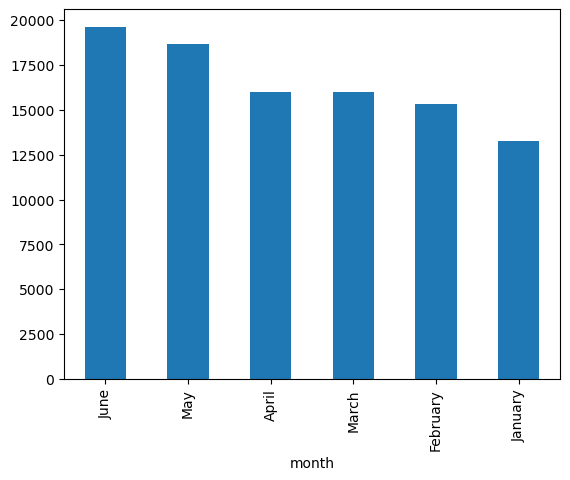

In [51]:
uber['month'].value_counts().plot(kind='bar')

In [53]:
uber['weekdays'] = uber['Pickup_date'].dt.day_name()

In [55]:
uber.head(4)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekdays
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday


In [57]:
pivot = pd.crosstab(index=uber['month'], columns = uber['weekdays'])
pivot

weekdays,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2580,1907,2455,2095,2333,2043,1936
January,2414,1300,2614,1573,2287,1389,1673
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


<Axes: xlabel='month'>

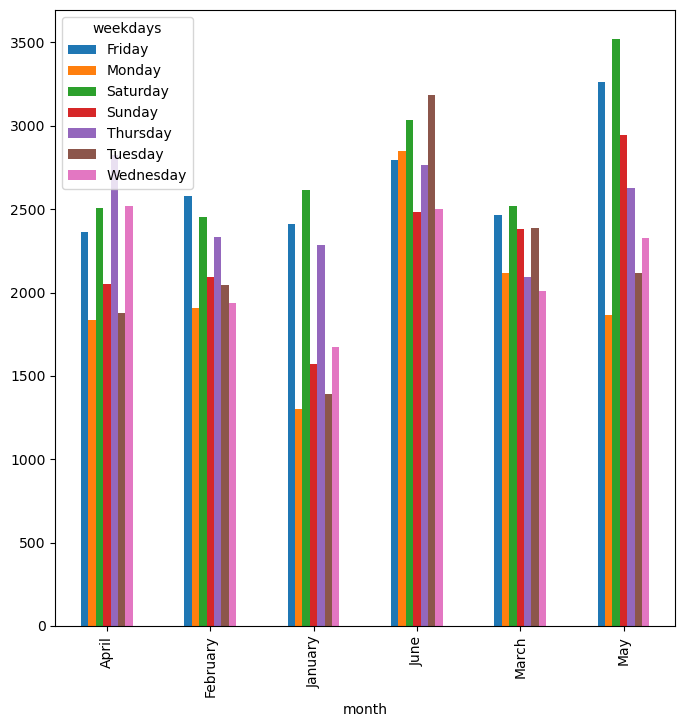

In [59]:
pivot.plot(kind='bar', figsize=(8,8))


The hourly rush in New York city on all days

In [62]:
uber['hours'] = uber['Pickup_date'].dt.hour

In [64]:
uber['hours'].head(4)

0    21
1    19
2    20
3    17
Name: hours, dtype: int32

In [66]:
summary = uber.groupby(['weekdays', 'hours'], as_index=False).size()
summary

,weekdays,hours,size
0,Friday,0,576
1,Friday,1,332
2,Friday,2,194
3,Friday,3,137
4,Friday,4,158
...,...,...,...
163,Wednesday,19,1026
164,Wednesday,20,893
165,Wednesday,21,937
166,Wednesday,22,890


<Axes: xlabel='hours', ylabel='size'>

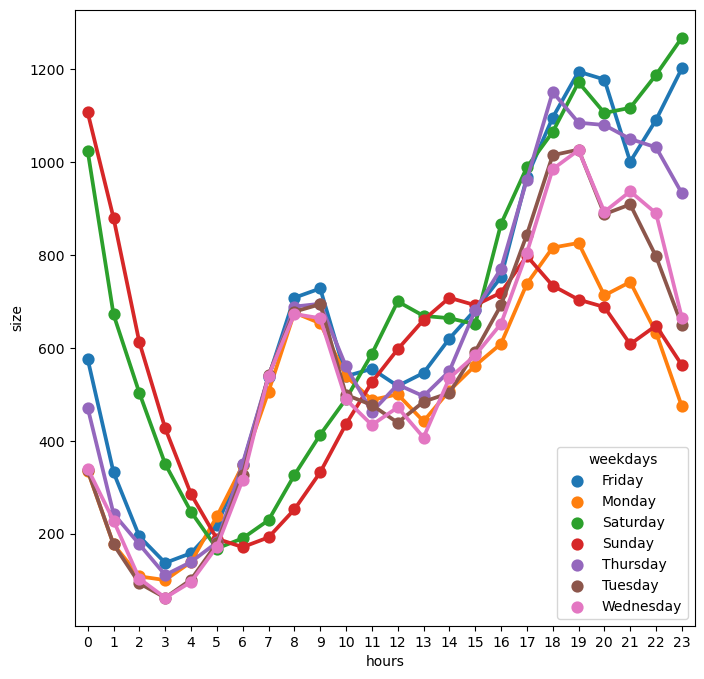

In [68]:
plt.figure(figsize=(8,8))
sns.pointplot(x = "hours", y = "size", hue="weekdays", data = summary )

In [70]:
uber_foil = pd.read_csv(r"C:\Users\Srinivasa Rao\Downloads\Uber\Datasets/Uber-Jan-Feb-FOIL.csv")
uber_foil

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [73]:
!pip install chart_studio
! pip install plotly

In [74]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [77]:
init_notebook_mode(connected=True)

In [79]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

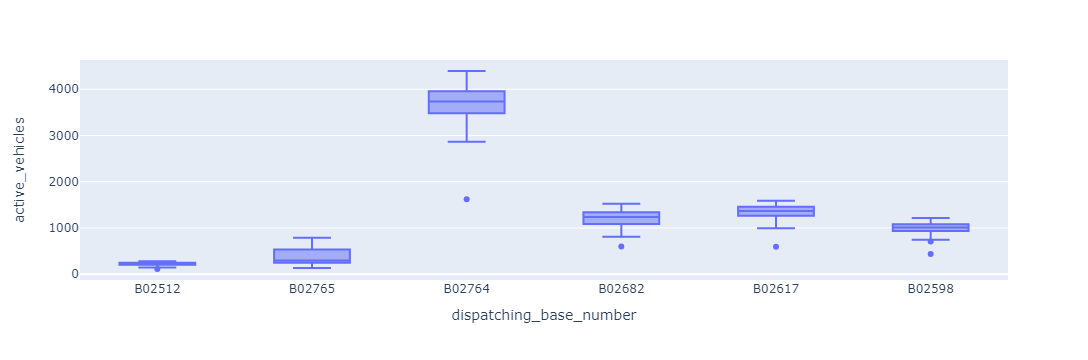

In [81]:
px.box(x = 'dispatching_base_number', y = 'active_vehicles', data_frame = uber_foil)


Collect entire data & Make it ready for the Data Analysis

In [86]:
files = os.listdir(r"C:\Users\Srinivasa Rao\Downloads\Uber\Datasets")[-8:]
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [88]:
files.remove('uber-raw-data-janjune-15.csv')

In [90]:
files.remove('uber-raw-data-janjune-15_sample.csv')

In [92]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [100]:
final = pd.DataFrame()
path = r"C:\Users\Srinivasa Rao\Downloads\Uber\Datasets"
for file in files :
    current_df = pd.read_csv(path+'/'+file)
    final = pd.concat([current_df, final])

In [102]:
final.shape

(4534327, 4)

In [104]:
final.duplicated().sum()

82581

In [106]:
final.drop_duplicates(inplace=True)

In [108]:
final.shape

(4451746, 4)

In [110]:
final.head(4)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512


At what locations of New York City we are getting rush?

In [113]:
rush_uber = final.groupby(['Lat', 'Lon'], as_index=False).size()

In [115]:
rush_uber.head(6)


,Lat,Lon,size
0,39.6569,-74.2258,1
1,39.6686,-74.1607,1
2,39.7214,-74.2446,1
3,39.8416,-74.1512,1
4,39.9055,-74.0791,1
5,39.9196,-74.1112,1


In [117]:
!pip install folium

   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   ----------- --------------------------- 30.7/108.4 kB 163.8 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/108.4 kB 245.8 kB/s eta 0:00:01
   ----------------------------- --------- 81.9/108.4 kB 351.4 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/108.4 kB 368.6 kB/s eta 0:00:01
   -------------------------------------- 108.4/108.4 kB 313.7 kB/s eta 0:00:00


In [125]:
import folium

In [127]:
basemap = folium.Map()

In [129]:
basemap

Make this Notebook Trusted to load map: File -> Trust Notebook

thank you!!!